In [0]:
import urllib.request
stringInURL = "https://www.gutenberg.org/files/65129/65129-0.txt"
urllib.request.urlretrieve(stringInURL, "/tmp/finaProject_data.txt")

Out[1]: ('/tmp/finaProject_data.txt', <http.client.HTTPMessage at 0x7f90b4512e80>)

In [0]:
# moving file from tmp folder to data folder of dbfs.
dbutils.fs.mv("file:/tmp/finaProject_data.txt", "dbfs:/data/finaProject_data.txt")

Out[2]: True

In [0]:
# Tranfering the file to the Spark job.
wordRDD = sc.textFile("dbfs:/data/finaProject_data.txt")


In [0]:
wordcountRDD = wordRDD.flatMap(lambda line : line.lower().strip().split(" "))

In [0]:
import re
# removing punctutations.
cleanTokenRDD = wordcountRDD.map(lambda words: re.sub(r'[^a-zA-Z]','',words))

In [0]:
from pyspark.ml.feature import StopWordsRemover
remove =StopWordsRemover()
stopWords = remove.getStopWords()
cleanDataRDD=cleanTokenRDD.filter(lambda words: words not in stopWords)

In [0]:
# Removing the spaces/emptywords
FinalRDD = cleanDataRDD.filter(lambda x: x != "")
#maps the words to key value pairs
IKVPairsRDD= FinalRDD.map(lambda word: (word,1))

In [0]:

# Converting the keyvalue pairs to word count.
FinalresultRDD = IKVPairsRDD.reduceByKey(lambda acc, value: acc+value)

In [0]:

# Sorting the words in the descending order and printing the results to check the first 10 results in descending order.
results = FinalresultRDD.map(lambda x: (x[1], x[0])).sortByKey(False).take(10)
print(results)

[(239, 'bow'), (112, 'must'), (109, 'play'), (104, 'music'), (98, 'played'), (97, 'one'), (94, 'work'), (90, 'notes'), (89, 'point'), (88, 'project')]

Count Words
0 239 bow
1 112 must
2 109 play
3 104 music
4 98 played
5 97 one
6 94 work
7 90 notes
8 89 point
9 88 project
Out[12]:

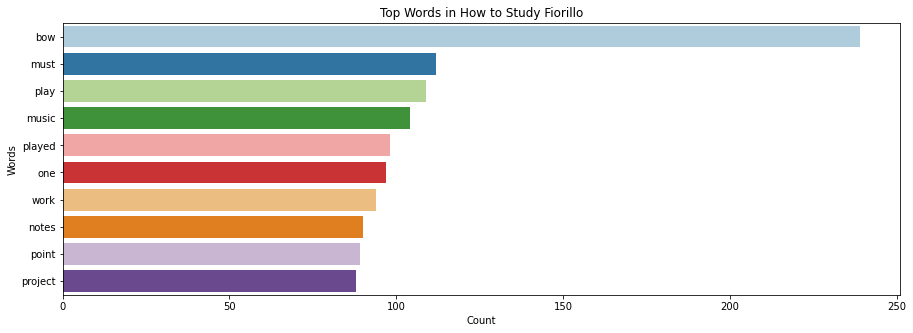

Text(0.5, 1.0, 'Top Words in How to Study Fiorillo')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

source = 'How to Study Fiorillo'
title = 'Top Words in ' + source
xlabel = 'Count'
ylabel = 'Words'

# create Pandas dataframe from list of tuples
df = pd.DataFrame.from_records(results, columns =[xlabel, ylabel]) 
print(df)

# create plot (using matplotlib)
plt.figure(figsize=(15,5))
sns.barplot(xlabel, ylabel, data=df, palette="Paired").set_title(title)